In [31]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

data_path = '/proj/NIRAL/users/siyangj/NeonateMRISeg/TrialData/'
min_path = '/proj/NIRAL/users/siyangj/myTrialData/minimal/'
normal_path = '/proj/NIRAL/users/siyangj/myTrialData/min_normal/'

In [2]:
im_num = np.arange(1,9)
suf1 = ['','-flip']
suf2 = {'-seg':'seg/','-T1-stripped':'T1/','-T2-stripped':'T2/'}
cur_dim = np.array([130,140,120])
tar_dim = np.array([136,144,120])
dif_dim = tar_dim - cur_dim
haf_dim = tar_dim / 2

In [28]:
for i in im_num:
    for s in suf1:
        for t,d in suf2.items():
            im_cur = sitk.ReadImage(data_path+str(i)+s+t+'.nrrd')
            ## Padding the image so that can be handled by 3D U-net
            im_pad = sitk.ConstantPad(im_cur,[0,2,3],[0,2,3],constant=0)
            sitk.WriteImage(im_pad,new_path+d+str(i)+s+'.nrrd')

In [35]:
for i in im_num:
    for s in suf1:
        im_T1 = sitk.ReadImage(new_path+'T1/'+str(i)+s+'.nrrd')
        im_T2 = sitk.ReadImage(new_path+'T2/'+str(i)+s+'.nrrd')
        im_C  = sitk.Compose(im_T1,im_T2)
        sitk.WriteImage(im_C,new_path+'T1T2/'+str(i)+s+'.nrrd')

26 115 89
13 128 115
12 105 93
(130, 140, 120)


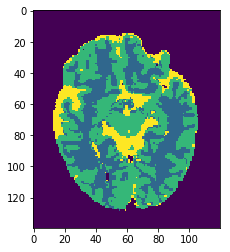

In [27]:
im_name = 'BUSS_2083_neoseg-3Labels.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0)

print(arr.shape)

20 115 95
12 131 119
12 106 94
(130, 140, 120)


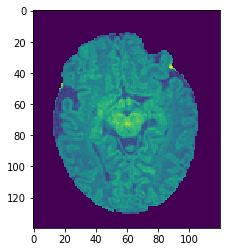

In [28]:
im_name = 'BUSS_2083_T1_reg-stripped.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0)

print(arr.shape)

20 115 96
12 131 120
12 106 95
(120, 140, 130)


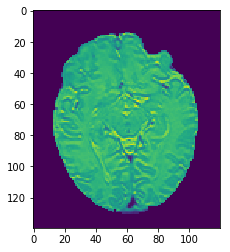

In [40]:
im_name = 'BUSS_2083_T2_reg-stripped.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0+1)

print(im.GetSize())

In [41]:
## minimal
BUSS_Crop = ([12, 12, 20], [13, 8, 14])

sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T1_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_T1.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T2_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_T2.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_neoseg-3Labels.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_seg.nrrd')

(96, 120, 95)


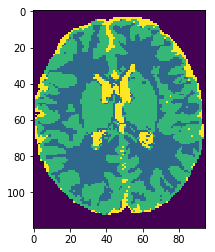

In [42]:
im_name = 'BUSS_2083_seg.nrrd'
im = sitk.ReadImage(min_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])
print(arr.shape)

In [36]:
## min_normal, i.e. (96,112,96)
BUSS_Crop = ([11, 16, 20], [13, 12, 14])

sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T1_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_T1.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T2_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_T2.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_neoseg-3Labels.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_seg.nrrd')

(96, 112, 96)


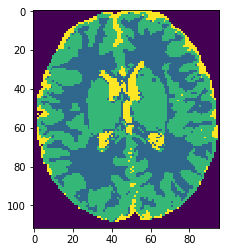

In [39]:
im_name = 'BUSS_2083_seg.nrrd'
im = sitk.ReadImage(normal_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])
print(arr.shape)

0 175 175
1 255 254
1 255 254
(176, 256, 256)


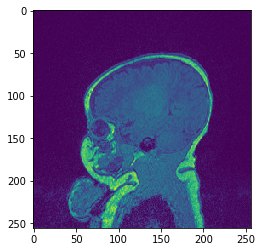

In [54]:
im_name = 'CARE_2002_1_T1_0009.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0)

print(arr.shape)

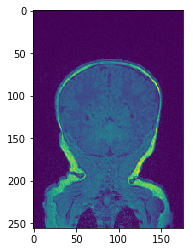

In [52]:
plt.imshow(np.swapaxes(arr,0,2)[150,:,:])

In [55]:
im.GetSpacing()

(0.8203128659535945, 0.8203126943190627, 0.7999996425411702)

20 115 95
12 131 119
12 106 94
(130, 140, 120)


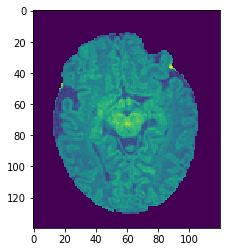

In [28]:
im_name = 'BUSS_2083_T1_reg-stripped.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0)

print(arr.shape)

20 115 96
12 131 120
12 106 95
(120, 140, 130)


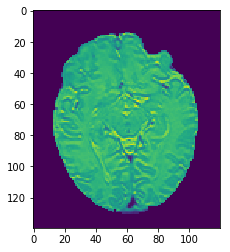

In [40]:
im_name = 'BUSS_2083_T2_reg-stripped.nrrd'
im = sitk.ReadImage(data_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])

for i in range(3):
    min0 = min(np.where(arr>0)[i])
    max0 = max(np.where(arr>0)[i])
    print(min0,max0,max0-min0+1)

print(im.GetSize())

In [41]:
## minimal
BUSS_Crop = ([12, 12, 20], [13, 8, 14])

sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T1_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_T1.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T2_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_T2.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_neoseg-3Labels.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               min_path+'BUSS_2083_seg.nrrd')

(96, 120, 95)


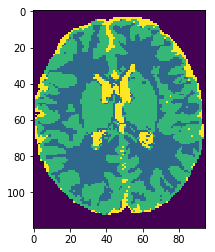

In [42]:
im_name = 'BUSS_2083_seg.nrrd'
im = sitk.ReadImage(min_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])
print(arr.shape)

In [36]:
## min_normal, i.e. (96,112,96)
BUSS_Crop = ([11, 16, 20], [13, 12, 14])

sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T1_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_T1.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_T2_reg-stripped.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_T2.nrrd')
sitk.WriteImage(sitk.Crop(sitk.ReadImage(data_path+'BUSS_2083_neoseg-3Labels.nrrd'),
                          BUSS_Crop[0],BUSS_Crop[1]),
               normal_path+'BUSS_2083_seg.nrrd')

(96, 112, 96)


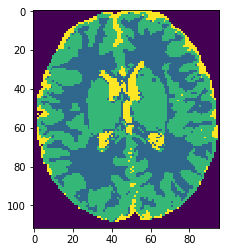

In [39]:
im_name = 'BUSS_2083_seg.nrrd'
im = sitk.ReadImage(normal_path+im_name)
arr = sitk.GetArrayFromImage(im)
plt.imshow(arr[60,:,:])
print(arr.shape)